# The Forest of Forgetfulness

A workbook for "The Forest of Forgetfulness" puzzles, as described in *What is the Name of This Book?* by Raymond Smullyan.

## The Lion and the Unicorn
When Alice entered the Forest of Forgetfulness, she did not forget *everything*, only certain things. She often forgot her name, and the one thing she was most likely to forget was the day of the week. Now, the Lion and the Unicorn were frequent visitors to the forest. These two are strange creatures. The Lion lies on **Mondays**, **Tuesdays**, and **Wednesdays**, and tells the truth on the other days of the week. The Unicorn, on the other hand, lies on **Thursdays**, **Fridays**, and **Saturdays**, but tells the truth on other days of the week.

In [1]:
# first we define the days of the week
daysOfWeek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
print(daysOfWeek)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


In [2]:
# if we say one of several days was yesterday, return the possible days for 'today'
def fromYesterdays(yesterdays):
    return [daysOfWeek[(daysOfWeek.index(day) + 1) % (len(daysOfWeek))] for day in yesterdays]

In [3]:
fromYesterdays(['Tuesday','Sunday'])

['Wednesday', 'Monday']

In [4]:
# if we say one of several days will be tomorrow, return the possible days for 'today'
def fromTomorrows(tomorrows):
    return [daysOfWeek[(daysOfWeek.index(day) - 1) % (len(daysOfWeek))] for day in tomorrows]
   

In [5]:
fromTomorrows(['Monday','Tuesday','Sunday'])

['Sunday', 'Monday', 'Saturday']

In [6]:
# as mentioned above, these creatures lie on certain days
lionLying =['Monday', 'Tuesday', 'Wednesday']
unicornLying = ['Thursday', 'Friday', 'Saturday']

In [7]:
# given a list of days, what are the other days of the week?
def otherDays(days):
    return [day for day in daysOfWeek if day not in days]

In [8]:
otherDays(['Monday'])

['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [9]:
# we can find when the Lion and Unicorn are truthful
lionTruthful = otherDays(lionLying)
unicornTruthful = otherDays(unicornLying)

In [10]:
print(lionTruthful)

['Thursday', 'Friday', 'Saturday', 'Sunday']


In [11]:
# return the days of the week that are common to both lists
def intersect(a, b):
    return [item for item in a if item in b]
    
# return the days of the week that appear in either list
def union(a, b):
    return list(a) + [item for item in b if item not in a]
    

There is only one day where the Lion and the Unicorn are both truthful.

In [12]:
intersect(lionTruthful,unicornTruthful)

['Sunday']

There is no day when they are both lying

In [13]:
intersect(lionLying, unicornLying )

[]

Put another way, they are lying most of the week - only Sunday is a day where there is no lying.

In [14]:
print(union(lionLying, unicornLying))
print(intersect(unicornTruthful, lionTruthful))

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
['Sunday']


But everyday someone is telling the truth

In [15]:
union(lionTruthful, unicornTruthful)

['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday']

## Problem 1
One day Alice met the Lion and the Unicorn resting under a tree. They made the following statements:
> **Lion**: Yesterday was one of my lying days.

> **Unicorn**: Yesterday was one of my lying days too.

In [16]:
lionPositive = intersect(fromYesterdays(lionLying), lionTruthful)
lionNegative = intersect(otherDays(fromYesterdays(lionLying)), lionLying)
lionDays = union(lionPositive, lionNegative)
unicornPositive = intersect(fromYesterdays(unicornLying), unicornTruthful)
unicornNegative = intersect(otherDays(fromYesterdays(unicornLying)),unicornLying)
unicornDays = union(unicornPositive, unicornNegative)
print('lion could be saying this on ' + str(lionDays))
print('unicorn could be saying this on ' + str(unicornDays))
validDays = intersect(lionDays, unicornDays)
if (len(validDays) == 1):
    print('the solution is that today is ' + validDays[0])
else :
    print('there is no unique solution, it could be one of these ' + str(validDays))

lion could be saying this on ['Thursday', 'Monday']
unicorn could be saying this on ['Sunday', 'Thursday']
the solution is that today is Thursday


In [17]:
# let's make the process above into a function
def solve(lionStatement, unicornStatement):
    lionPositive = intersect(lionStatement, lionTruthful)
    lionNegative = intersect(otherDays(lionStatement), lionLying)
    lionDays = union(lionPositive, lionNegative)
    unicornPositive = intersect(unicornStatement, unicornTruthful)
    unicornNegative = intersect(otherDays(unicornStatement),unicornLying)
    unicornDays = union(unicornPositive, unicornNegative)
    print('The lion could be saying this on ' + str(lionDays))
    print('The unicorn could be saying this on ' + str(unicornDays))
    validDays = intersect(lionDays, unicornDays)
    if (len(validDays) == 1):
        print('So, the solution is that today is ' + validDays[0])
    else :
        print('Unfortunately, there is no unique solution, it could be one of these ' + str(validDays))
    

In [18]:
solve(fromYesterdays(lionLying), fromYesterdays(unicornLying))

The lion could be saying this on ['Thursday', 'Monday']
The unicorn could be saying this on ['Sunday', 'Thursday']
So, the solution is that today is Thursday


## Problem 2
One day Alice met the Lion and the Unicorn resting under a tree. They made the following statements:
> Lion: Yesterday was one of my truthful days.

> Unicorn: Yesterday was one of my truthful days too.

In [19]:
solve(fromYesterdays(lionTruthful), fromYesterdays(unicornTruthful))

The lion could be saying this on ['Friday', 'Saturday', 'Sunday', 'Tuesday', 'Wednesday']
The unicorn could be saying this on ['Tuesday', 'Wednesday', 'Monday', 'Friday', 'Saturday']
Unfortunately, there is no unique solution, it could be one of these ['Friday', 'Saturday', 'Tuesday', 'Wednesday']


## Problem 3
One day Alice met the Lion and the Unicorn resting under a tree. They made the following statements:
> Lion: Yesterday was one of my truthful days.

> Unicorn: Yes, yesterday was one of Lion's truthful days

In [20]:
solve(fromYesterdays(lionTruthful), fromYesterdays(lionTruthful))

The lion could be saying this on ['Friday', 'Saturday', 'Sunday', 'Tuesday', 'Wednesday']
The unicorn could be saying this on ['Sunday', 'Monday', 'Thursday']
So, the solution is that today is Sunday


## Problem 4
One day Alice met the Lion and the Unicorn resting under a tree. They made the following statements:
> Lion: Yesterday was one of my truthful days.

> Unicorn: Actually, it was one of his lying days

In [21]:
solve(fromYesterdays(lionTruthful), fromYesterdays(lionLying))

The lion could be saying this on ['Friday', 'Saturday', 'Sunday', 'Tuesday', 'Wednesday']
The unicorn could be saying this on ['Tuesday', 'Wednesday', 'Friday', 'Saturday']
Unfortunately, there is no unique solution, it could be one of these ['Friday', 'Saturday', 'Tuesday', 'Wednesday']


## Problem 5
One day Alice met the Lion and the Unicorn resting under a tree. They made the following statements:
> Lion: Tomorrow is one  of my truthful days.

> Unicorn: Yesterday was one of my lying days.

In [22]:
solve(fromTomorrows(lionTruthful), fromYesterdays(unicornLying))

The lion could be saying this on ['Thursday', 'Friday', 'Saturday', 'Monday', 'Tuesday']
The unicorn could be saying this on ['Sunday', 'Thursday']
So, the solution is that today is Thursday


# All Possible Puzzles
Using these puzzles as a model, we can have the Lion and the Unicorn make a statement about either yesterday, today, or tomorrow being one of the lying or truthful days for themselves, or the other.

In [23]:
# let's define a function to help us generate all the different lists of days that might be talked about
def variations(statements):
    return [statements, fromTomorrows(statements), fromYesterdays(statements)]

# now create a list of lists
allDays = [];
allDays.extend(variations(lionLying))
allDays.extend(variations(lionTruthful))
allDays.extend(variations(unicornLying))
allDays.extend(variations(unicornTruthful))

print(allDays)
print()
print('There are ' + str(len(allDays)) + ' possible statements each creature can make.')

[['Monday', 'Tuesday', 'Wednesday'], ['Sunday', 'Monday', 'Tuesday'], ['Tuesday', 'Wednesday', 'Thursday'], ['Thursday', 'Friday', 'Saturday', 'Sunday'], ['Wednesday', 'Thursday', 'Friday', 'Saturday'], ['Friday', 'Saturday', 'Sunday', 'Monday'], ['Thursday', 'Friday', 'Saturday'], ['Wednesday', 'Thursday', 'Friday'], ['Friday', 'Saturday', 'Sunday'], ['Monday', 'Tuesday', 'Wednesday', 'Sunday'], ['Sunday', 'Monday', 'Tuesday', 'Saturday'], ['Tuesday', 'Wednesday', 'Thursday', 'Monday']]

There are 12 possible statements each creature can make.


In [24]:
# a variation on the solve function that j# let's make the process above into a function
def hasSolution(lionStatement, unicornStatement):
    lionPositive = intersect(lionStatement, lionTruthful)
    lionNegative = intersect(otherDays(lionStatement), lionLying)
    lionDays = union(lionPositive, lionNegative)
    unicornPositive = intersect(unicornStatement, unicornTruthful)
    unicornNegative = intersect(otherDays(unicornStatement),unicornLying)
    unicornDays = union(unicornPositive, unicornNegative)
    validDays = intersect(lionDays, unicornDays)
    return (len(validDays) == 1)


In [25]:
# test the above
hasSolution(fromTomorrows(lionTruthful), fromYesterdays(lionLying))

False

We can loop through all combinations of the Lion and Unicorn making each statement, and apply this function to each.

In [26]:
solutionCount = 0
totalCount = 0
for s1 in allDays:
    for s2 in allDays:
        totalCount = totalCount + 1
        if hasSolution(s1,s2):
            solutionCount = solutionCount + 1
print('We found ' + str(solutionCount) + ' puzzles with solutions out of ' + str(totalCount) +' possible combinations')            

We found 43 puzzles with solutions out of 144 possible combinations


Let's write some utilities to print out all the valid puzzle statements and solutions.

In [27]:
def annotatedVariations(base):
    today = {'description': base['actor'] + ' told ' + base['state'] + ' today', 'days': base['days']}
    tomorrow = {'description': base['actor'] + ' will tell ' + base['state'] + ' tomorrow', 'days': fromTomorrows(base['days'])}
    yesterday = {'description': base['actor'] +' told ' + base['state'] + ' yesterday', 'days': fromYesterdays(base['days'])}
    return [today, tomorrow, yesterday]

allAnnotated = [];
allAnnotated.extend(annotatedVariations({'actor': 'Lion', 'state': 'lies', 'days': lionLying}))
allAnnotated.extend(annotatedVariations({'actor': 'Lion', 'state': 'truths', 'days': lionTruthful}))
allAnnotated.extend(annotatedVariations({'actor': 'Unicorn', 'state': 'lies', 'days': unicornLying}))
allAnnotated.extend(annotatedVariations({'actor': 'Unicorn', 'state': 'truths', 'days': unicornTruthful}))
print ("There are " + str(len(allAnnotated)) + " sentences")
print(allAnnotated)

There are 12 sentences
[{'description': 'Lion told lies today', 'days': ['Monday', 'Tuesday', 'Wednesday']}, {'description': 'Lion will tell lies tomorrow', 'days': ['Sunday', 'Monday', 'Tuesday']}, {'description': 'Lion told lies yesterday', 'days': ['Tuesday', 'Wednesday', 'Thursday']}, {'description': 'Lion told truths today', 'days': ['Thursday', 'Friday', 'Saturday', 'Sunday']}, {'description': 'Lion will tell truths tomorrow', 'days': ['Wednesday', 'Thursday', 'Friday', 'Saturday']}, {'description': 'Lion told truths yesterday', 'days': ['Friday', 'Saturday', 'Sunday', 'Monday']}, {'description': 'Unicorn told lies today', 'days': ['Thursday', 'Friday', 'Saturday']}, {'description': 'Unicorn will tell lies tomorrow', 'days': ['Wednesday', 'Thursday', 'Friday']}, {'description': 'Unicorn told lies yesterday', 'days': ['Friday', 'Saturday', 'Sunday']}, {'description': 'Unicorn told truths today', 'days': ['Monday', 'Tuesday', 'Wednesday', 'Sunday']}, {'description': 'Unicorn will t

In [28]:
dayCounts = {}
for day in daysOfWeek:
    dayCounts.update({day: 0})
    
def addDayCount(day):
    dayCounts[day] = dayCounts[day] +1
    
def describeIfValid(lionStatement, unicornStatement, counter):
    #print(lionStatement)
    lionPositive = intersect(lionStatement['days'], lionTruthful)
    lionNegative = intersect(otherDays(lionStatement['days']), lionLying)
    lionDays = union(lionPositive, lionNegative)
    unicornPositive = intersect(unicornStatement['days'], unicornTruthful)
    unicornNegative = intersect(otherDays(unicornStatement['days']),unicornLying)
    unicornDays = union(unicornPositive, unicornNegative)
    validDays = intersect(lionDays, unicornDays)
    if (len(validDays) != 1):
        return False
    addDayCount(validDays[0])
    print("Puzzle " + str(counter +1))
    if ('Lion' in lionStatement['description']):
        print("The Lion says: " + lionStatement['description'].replace("Lion", "I") + '.')
    else:
        print("The Lion says: " + lionStatement['description'] + '.')
    if ('Unicorn' in unicornStatement['description']):
        print("The Unicorn says: " + unicornStatement['description'].replace("Unicorn", "I") + '.')
    else:
        print("The Unicorn says: " + unicornStatement['description'] + '.')
    print("SOLUTION: Today is " + validDays[0]) 
    print("--------------")
    print()
    return True

solutionCount = 0
for s1 in allAnnotated:
    for s2 in allAnnotated:
        if describeIfValid(s1,s2,solutionCount):
            solutionCount = solutionCount + 1


Puzzle 1
The Lion says: I will tell lies tomorrow.
The Unicorn says: Lion told lies today.
SOLUTION: Today is Wednesday
--------------

Puzzle 2
The Lion says: I will tell lies tomorrow.
The Unicorn says: Lion will tell lies tomorrow.
SOLUTION: Today is Sunday
--------------

Puzzle 3
The Lion says: I will tell lies tomorrow.
The Unicorn says: Lion told lies yesterday.
SOLUTION: Today is Wednesday
--------------

Puzzle 4
The Lion says: I will tell lies tomorrow.
The Unicorn says: Lion told truths today.
SOLUTION: Today is Sunday
--------------

Puzzle 5
The Lion says: I will tell lies tomorrow.
The Unicorn says: Lion will tell truths tomorrow.
SOLUTION: Today is Wednesday
--------------

Puzzle 6
The Lion says: I will tell lies tomorrow.
The Unicorn says: Lion told truths yesterday.
SOLUTION: Today is Sunday
--------------

Puzzle 7
The Lion says: I will tell lies tomorrow.
The Unicorn says: I will tell lies tomorrow.
SOLUTION: Today is Wednesday
--------------

Puzzle 8
The Lion says

In [29]:
print(solutionCount)
print(dayCounts)

43
{'Monday': 1, 'Tuesday': 0, 'Wednesday': 10, 'Thursday': 10, 'Friday': 0, 'Saturday': 1, 'Sunday': 21}


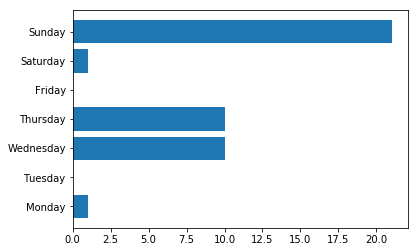

In [30]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


height = []
for d in dayCounts:
    height.append(dayCounts[d])
x_axis = np.arange(len(daysOfWeek))    
plt.barh(x_axis, height)
plt.yticks(x_axis, daysOfWeek)
plt.show()

## Even more puzzles

We can extend the number of puzzles by allowing the Lion and the Unicorn to talk about specific days, weekends, and weekdays.

In [31]:
def individualDays():
    return [{'description': 'Today is ' + d, 'days':[d]} for d in daysOfWeek]

def weekAndWeekend():
    weekend = ['Saturday', 'Sunday']
    return [{'description': 'Today is a weekday', 'days': otherDays(weekend)},
            {'description': 'It is the weekend', 'days': weekend}]

In [32]:
moreAnnotated = list(allAnnotated)
moreAnnotated.extend(individualDays())
moreAnnotated.extend(weekAndWeekend())

In [33]:
moreAnnotated

[{'description': 'Lion told lies today',
  'days': ['Monday', 'Tuesday', 'Wednesday']},
 {'description': 'Lion will tell lies tomorrow',
  'days': ['Sunday', 'Monday', 'Tuesday']},
 {'description': 'Lion told lies yesterday',
  'days': ['Tuesday', 'Wednesday', 'Thursday']},
 {'description': 'Lion told truths today',
  'days': ['Thursday', 'Friday', 'Saturday', 'Sunday']},
 {'description': 'Lion will tell truths tomorrow',
  'days': ['Wednesday', 'Thursday', 'Friday', 'Saturday']},
 {'description': 'Lion told truths yesterday',
  'days': ['Friday', 'Saturday', 'Sunday', 'Monday']},
 {'description': 'Unicorn told lies today',
  'days': ['Thursday', 'Friday', 'Saturday']},
 {'description': 'Unicorn will tell lies tomorrow',
  'days': ['Wednesday', 'Thursday', 'Friday']},
 {'description': 'Unicorn told lies yesterday',
  'days': ['Friday', 'Saturday', 'Sunday']},
 {'description': 'Unicorn told truths today',
  'days': ['Monday', 'Tuesday', 'Wednesday', 'Sunday']},
 {'description': 'Unicorn

In [34]:
solutionCount = 0
for s1 in moreAnnotated:
    for s2 in moreAnnotated:
        if describeIfValid(s1,s2,solutionCount):
            solutionCount = solutionCount + 1

Puzzle 1
The Lion says: I will tell lies tomorrow.
The Unicorn says: Lion told lies today.
SOLUTION: Today is Wednesday
--------------

Puzzle 2
The Lion says: I will tell lies tomorrow.
The Unicorn says: Lion will tell lies tomorrow.
SOLUTION: Today is Sunday
--------------

Puzzle 3
The Lion says: I will tell lies tomorrow.
The Unicorn says: Lion told lies yesterday.
SOLUTION: Today is Wednesday
--------------

Puzzle 4
The Lion says: I will tell lies tomorrow.
The Unicorn says: Lion told truths today.
SOLUTION: Today is Sunday
--------------

Puzzle 5
The Lion says: I will tell lies tomorrow.
The Unicorn says: Lion will tell truths tomorrow.
SOLUTION: Today is Wednesday
--------------

Puzzle 6
The Lion says: I will tell lies tomorrow.
The Unicorn says: Lion told truths yesterday.
SOLUTION: Today is Sunday
--------------

Puzzle 7
The Lion says: I will tell lies tomorrow.
The Unicorn says: I will tell lies tomorrow.
SOLUTION: Today is Wednesday
--------------

Puzzle 8
The Lion says

With all these possible statements, we get to 132 puzzles.

In [35]:
print (solutionCount)

132


In [36]:
print(dayCounts)

{'Monday': 12, 'Tuesday': 6, 'Wednesday': 38, 'Thursday': 42, 'Friday': 10, 'Saturday': 13, 'Sunday': 54}


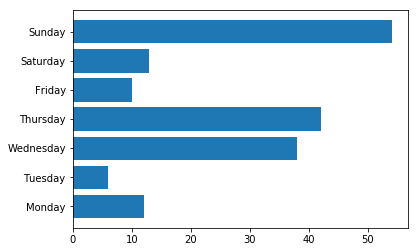

In [37]:
import numpy as np
import matplotlib.pyplot as plt

height = []
for d in dayCounts:
    height.append(dayCounts[d])
x_axis = np.arange(len(daysOfWeek))    
plt.barh(x_axis, height)
plt.yticks(x_axis, daysOfWeek)
plt.show()
